# Getting Real with Real Estate

In [2]:
#Libraries needed
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set_palette("muted")


## 1. Iowa Data Set

In [3]:
# Load Data Set
og_iowa=pd.read_csv('train.csv', sep=',')
df_iowa = og_iowa.copy()


### A. Year Built
#### I. Attribute Summary
#### II. Data Exploration
#### III. Missing Values
#### IV. Feature Engineering
#### V. Relationships

### B. Lot Area
#### I. Attribute Summary
N/A
#### II. Data Exploration & III. Missing Values

In [4]:
# Data description shows believable numbers with slight right skew
df_iowa.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

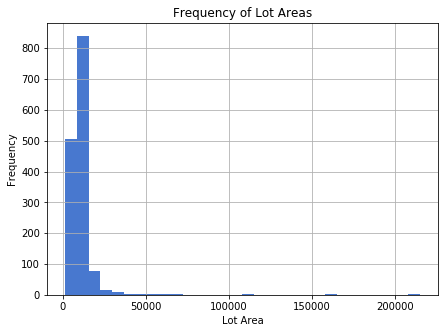

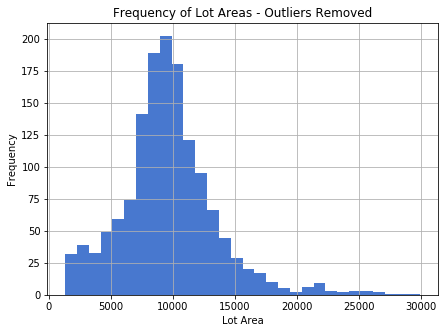

In [5]:
# Histogram shows significant outliers
plt.figure(figsize=(7,5))
df_iowa.LotArea.hist(bins=30)
plt.ylabel('Frequency')
plt.xlabel('Lot Area')
plt.title('Frequency of Lot Areas')

# Histogram removing outliers (defined as 2 standard deviations above the mean) tells us much more
max_size = (np.std(df_iowa['LotArea'])*2 + np.mean(df_iowa['LotArea']))
plt.figure(figsize=(7,5))
df_iowa.LotArea[df_iowa.LotArea < max_size].hist(bins=30)
plt.ylabel('Frequency')
plt.xlabel('Lot Area')
plt.title('Frequency of Lot Areas - Outliers Removed')
plt.show()

# There are no missing or mixed type values.

#### IV. Feature Engineering & V. Relationships

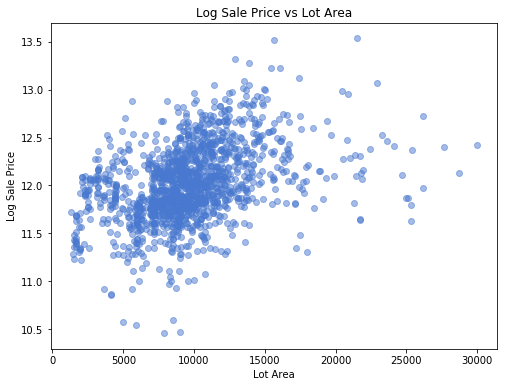

Log Sale Price to Lot Size correlation of 0.25731989235273867


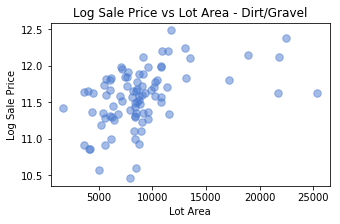

Dirt/Gravel has correlation of 0.3904797015083431


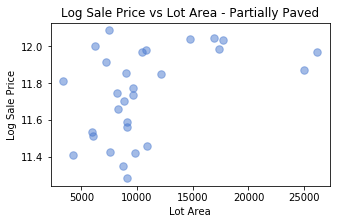

Partially Paved has correlation of 0.5529778411625719


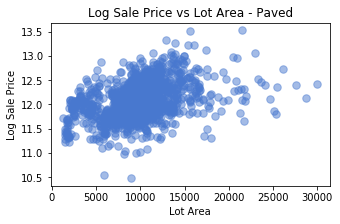

Paved has correlation of 0.25809132183465044


In [6]:
# Scatter plot of Log Price vs Lot Size, outliers removed
plt.figure(figsize=(8,6))
plt.scatter(df_iowa['LotArea'][df_iowa['LotArea'] < max_size], np.log(df_iowa['SalePrice'][df_iowa['LotArea'] < max_size]), \
            alpha = 0.5)
plt.ylabel('Log Sale Price')
plt.xlabel('Lot Area')
plt.title('Log Sale Price vs Lot Area')
plt.show()

# Log of Sale Price has weak correlation with Lot Size
print('Log Sale Price to Lot Size correlation of', np.corrcoef(df_iowa.LotArea, np.log(df_iowa.SalePrice))[0, 1])

# Hypothesis: splitting urban vs rural might show a stronger trend as urban lots may be more valuable. A urban/rural factor may
# be muddying the correlation. As there is no explicit rural/urban divide in the dataset, we split using a proxy of whether
# the driveway is paved or not.
for title, group in df_iowa.groupby('PavedDrive'):
    plt.figure(figsize=(5,3))
    plt.plot(group['LotArea'][group['LotArea'] < max_size], np.log(group['SalePrice'][group['LotArea'] < max_size]), \
                alpha = .5, linestyle ='', ms=15, marker='.')
    plt.ylabel('Log Sale Price')
    plt.xlabel('Lot Area')
    title_dict = {'N': 'Dirt/Gravel', 'P': 'Partially Paved', 'Y': 'Paved'}
    plt.title('Log Sale Price vs Lot Area - ' + title_dict[title])
    plt.show()
    print(title_dict[title], 'has correlation of', np.corrcoef(group.LotArea, np.log(group.SalePrice))[0, 1])
    
# Conclusion: Correlations are still medium at best and "rural" groupings have limited data, so the trend may not be signifiant.
# Since the rural vs. urban proxy does not appear particularly promising, only the overall trend will be used going forward.

### C. Living Area
#### I. Attribute Summary
#### II. Data Exploration
#### III. Missing Values
#### IV. Feature Engineering
#### V. Relationships

### D. Bed/Bath
#### I. Attribute Summary
N/A
#### II. Data Exploration & III. Missing Values

In [7]:
#four 0 bedroom houses

with pd.option_context("display.max_columns", 90):
    print(og_iowa[og_iowa['BedroomAbvGr'] == 0])

#remove 0 bedroom houses from data set
df_iowa = df_iowa[df_iowa.BedroomAbvGr > 0]


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
53      54          20       RL         68.0    50271   Pave   NaN      IR1   
189    190         120       RL         41.0     4923   Pave   NaN      Reg   
634    635          90       RL         64.0     6979   Pave   NaN      Reg   
1163  1164          90       RL         60.0    12900   Pave   NaN      Reg   
1213  1214          80       RL          NaN    10246   Pave   NaN      IR1   
1270  1271          40       RL          NaN    23595   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
53           Low    AllPub    Inside       Gtl      Veenker       Norm   
189          Lvl    AllPub    Inside       Gtl      StoneBr       Norm   
634          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
1163         Lvl    AllPub    Inside       Gtl       Sawyer      Feedr   
1213         Lvl    AllPub   CulDSac       Gtl       Sawyer       Norm   
12

#### IV. Feature Engineering

In [8]:
#Bed/Bath Feature engineering
df_iowa['log_SalePrice'] = np.log(df_iowa['SalePrice'])

# half bath is 0.5
df_iowa['hbath'] = df_iowa['BsmtHalfBath'] + df_iowa['HalfBath']  
df_iowa['hbath'] = np.where(df_iowa['hbath'] > 0, df_iowa['hbath']/2 , 0)
df_iowa['bath'] = df_iowa['BsmtFullBath'] + df_iowa['FullBath'] + df_iowa['hbath']

#bed_bath tuple
df_iowa['bed_bath'] = df_iowa[['BedroomAbvGr', 'bath']].apply(tuple, axis=1)

#sum bed bath
df_iowa['sum_bed_bath'] = df_iowa.BedroomAbvGr + df_iowa.bath



In [9]:
#bed bath graph

print(pd.crosstab(df_iowa.bath,df_iowa.BedroomAbvGr))


BedroomAbvGr   1    2    3   4  5  6  8
bath                                   
1.0            8  108  105   5  2  0  0
1.5            2   23   86  17  0  0  0
2.0           22  131  233  56  9  3  1
2.5           12   26  189  61  3  1  0
3.0            5   57   98  21  2  2  0
3.5            1   12   87  41  3  0  0
4.0            0    1    3   8  1  0  0
4.5            0    0    2   3  1  1  0
5.0            0    0    0   1  0  0  0
6.0            0    0    1   0  0  0  0


#### V. Relationships

Summary:
Bath is a better indicator than bedroom or bed bath

Text(0.5,1,'Box Plot of Log Sale Price by Bathrooms')

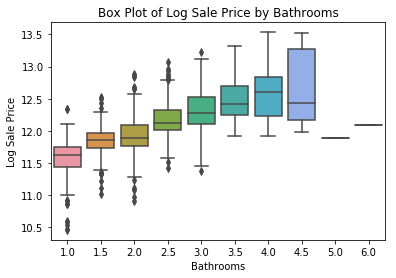

In [10]:
#bath has a strong correlation 
# plt.scatter(df_iowa['bath'], df_iowa['log_SalePrice'], alpha = 0.1 )
# plt.show()
sns.boxplot(df_iowa['bath'], df_iowa['log_SalePrice'])
plt.xlabel('Bathrooms')
plt.ylabel('Log Sale Price')
plt.title('Box Plot of Log Sale Price by Bathrooms')

Text(0.5,1,'Box Plot of Log Sale Price by Bedrooms')

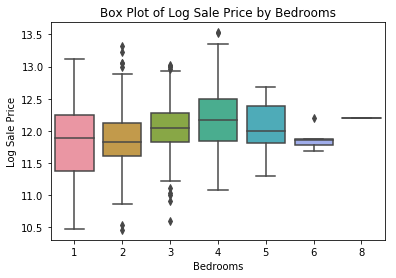

In [11]:
#bedroom correlation is not as strong
# plt.scatter(df_iowa['BedroomAbvGr'], df_iowa['log_SalePrice'], alpha = 0.1 )
# plt.show()
sns.boxplot(df_iowa['BedroomAbvGr'], df_iowa['log_SalePrice'])
plt.xlabel('Bedrooms')
plt.ylabel('Log Sale Price')
plt.title('Box Plot of Log Sale Price by Bedrooms')

Text(0.5,1,'Strip plot of log sale price by bed/bath tuple')

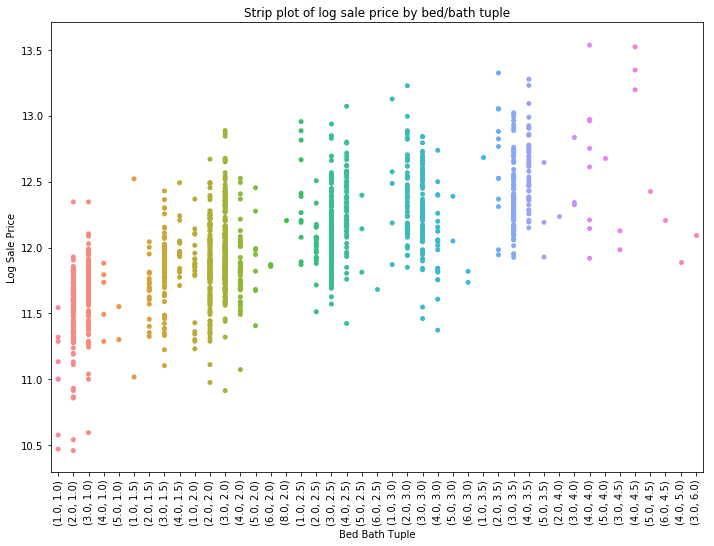

In [12]:
#can we see trend is made as tuples - no logical order
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=90)
# sns.stripplot(df_iowa['bed_bath'], df_iowa['log_SalePrice'], order=df_iowa['bath'].groupby(df_iowa['bed_bath']).median().sort_values().index.values)
sns.stripplot(df_iowa['bed_bath'], df_iowa['log_SalePrice'], order = df_iowa.groupby(df_iowa['bed_bath']).median().sort_values(['bath', 'BedroomAbvGr']).index.values)
plt.xlabel('Bed Bath Tuple')
plt.ylabel('Log Sale Price')
plt.title('Strip plot of log sale price by bed/bath tuple')

Text(0.5,1,'Strip plot of log sale price by sum of bed bath')

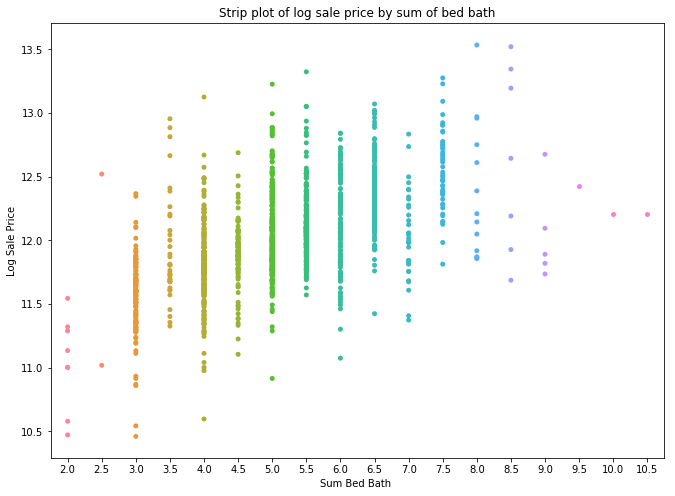

In [13]:
#summing bed and bath increase correlation

# df[['lat', 'long']].apply(tuple, axis=1)
a4_dims = (11, 8)
fig, ax = plt.subplots(figsize=a4_dims)
# plt.xticks(rotation=45)
# sns.boxplot(df_iowa['sum_bed_bath'], df_iowa['log_SalePrice'])
sns.stripplot(df_iowa['sum_bed_bath'], df_iowa['log_SalePrice'])
plt.xlabel('Sum Bed Bath ')
plt.ylabel('Log Sale Price')
plt.title('Strip plot of log sale price by sum of bed bath')

In [14]:
#ultimately nothing beats bath 
print(np.corrcoef(df_iowa.bath, df_iowa.log_SalePrice)[0, 1])
print(np.corrcoef(df_iowa.BedroomAbvGr, df_iowa.log_SalePrice)[0, 1])
print(np.corrcoef(df_iowa.sum_bed_bath, df_iowa.log_SalePrice)[0, 1])

0.6748897329362964
0.22215597709807783
0.5669799437333365


## 2. Confirming Trends

### A. Data Exploration of New Data

In [15]:
og_slo=pd.read_csv('RealEstate.csv', sep =',')
df_ca = og_slo.copy()

og_nc=pd.read_excel('woodard.xls')
df_nc = og_nc.copy()
# Import 2nd Dataset (California)
og_slo=pd.read_csv('RealEstate.csv', sep =',')
df_ca = og_slo.copy()
df_ca = df_ca[['Price', 'Bedrooms', 'Bathrooms', 'Size', 'Status']]
df_ca.columns = ['SalePrice', 'Bed', 'Bath', 'Sq_Ft', 'SaleType']

# Import 3rd Dataset (North Carolina)
og_nc=pd.read_excel('woodard.xls')
df_nc = og_nc.copy()
# new_file = pd.ExcelFile("woodard.xls")
# df_nc = new_file.parse("Sheet1")
df_nc = df_nc[['Total $', 'Year Built', 'Sq. Ft.', 'Story', 'No. Baths', 'Acres', 'Fireplaces']]
df_nc.columns = ['SalePrice', 'YearBuilt', 'Sq_Ft', 'Stories', 'Bath', 'LotArea', 'Fireplaces']
df_nc['LotArea'] = df_nc['LotArea'] * 43560


In [16]:
print(df_ca.describe())

          SalePrice         Bed        Bath        Sq_Ft
count  7.810000e+02  781.000000  781.000000   781.000000
mean   3.833291e+05    3.142125    2.355954  1755.058899
std    3.490381e+05    0.855768    0.846596   819.577603
min    2.650000e+04    0.000000    1.000000   120.000000
25%    1.990000e+05    3.000000    2.000000  1218.000000
50%    2.950000e+05    3.000000    2.000000  1550.000000
75%    4.290000e+05    4.000000    3.000000  2032.000000
max    5.499000e+06   10.000000   11.000000  6800.000000


In [17]:
df_nc.describe()


,SalePrice,YearBuilt,Sq_Ft,Stories,Bath,LotArea,Fireplaces
count,1.000000e+02,100.000000,100.00000,100.000000,99.000000,1.000000e+02,100.000000
mean,2.585740e+05,1975.910000,1729.50000,1.362500,2.025253,3.445160e+04,0.730000
std,4.910691e+05,16.544458,719.40491,0.447178,0.586296,1.703509e+05,0.468287
min,3.218400e+04,1909.000000,705.00000,1.000000,1.000000,0.000000e+00,0.000000
25%,1.239518e+05,1966.500000,1207.50000,1.000000,1.750000,8.712000e+03,0.000000
50%,1.664935e+05,1981.500000,1573.50000,1.000000,2.000000,1.328580e+04,1.000000
75%,2.740500e+05,1987.000000,2058.50000,1.812500,2.500000,2.188890e+04,1.000000
max,4.904102e+06,2003.000000,4650.00000,2.500000,3.000000,1.715393e+06,2.000000


### B. Outliers and Missing Values

In [18]:
df_ca[df_ca.Bed < 1]

,SalePrice,Bed,Bath,Sq_Ft,SaleType
102,275000.0,0,1,398,Short Sale
253,311900.0,0,1,910,Foreclosure


In [19]:
df_ca.Bath.value_counts()

2     444
3     226
1      65
4      33
5       8
7       2
6       2
11      1
Name: Bath, dtype: int64

Text(0.5,1,'Histogram of Sales Price - CA')

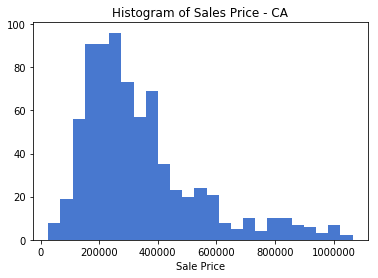

In [33]:
# max_house_price_ca = (np.std(df_ca['SalePrice'])*2 + np.mean(df_ca['SalePrice']))
fixed_ca = df_ca[df_ca['SalePrice'] < (np.std(df_ca['SalePrice'])*2 + np.mean(df_ca['SalePrice'])) ]
plt.hist(fixed_ca['SalePrice'],bins = 25)
plt.xlabel('Sale Price')
plt.title('Histogram of Sales Price - CA')

Text(0.5,1,'Histogram of Log Sales Price - CA')

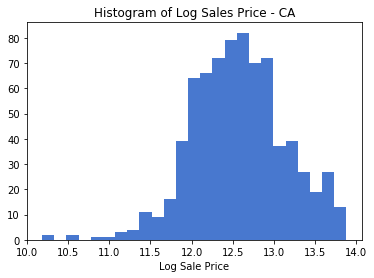

In [34]:
plt.hist(np.log(fixed_ca['SalePrice']),bins = 25)
plt.xlabel('Log Sale Price')
plt.title('Histogram of Log Sales Price - CA')

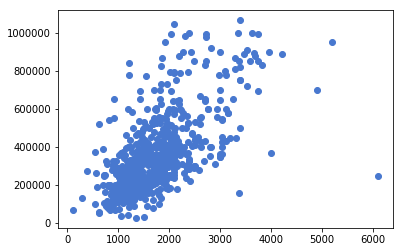

In [22]:
plt.scatter(fixed_ca.Sq_Ft, fixed_ca.SalePrice)

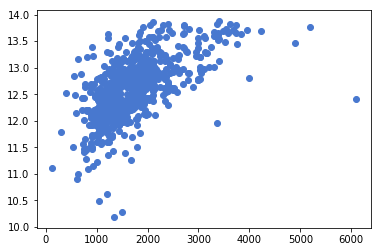

In [23]:
plt.scatter(fixed_ca.Sq_Ft, np.log(fixed_ca.SalePrice))

In [24]:
fixed_ca[(fixed_ca['Sq_Ft']) > 4000]
#drop foreclosure
#SaleType of house

,SalePrice,Bed,Bath,Sq_Ft,SaleType
111,890000.0,4,5,4229,Foreclosure
367,245000.0,5,3,6098,Short Sale
561,949000.0,5,4,5200,Short Sale
639,699000.0,10,11,4905,Short Sale


In [25]:
#missing lot area 
df_nc[df_nc.LotArea < 1]

,SalePrice,YearBuilt,Sq_Ft,Stories,Bath,LotArea,Fireplaces
35,136695,1949,720,1.5,1.0,0.0,0
49,61829,1972,1140,2.0,1.0,0.0,0
57,89871,1987,968,1.0,1.5,0.0,1


Text(0.5,1,'Histogram of Sales Price - NC')

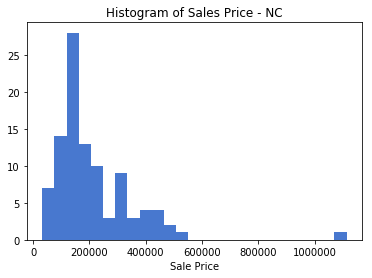

In [35]:
fixed_nc = df_nc[df_nc['SalePrice'] < np.std(df_nc['SalePrice'])*2 + np.mean(df_nc['SalePrice']) ]
plt.hist(fixed_nc['SalePrice'],bins = 25)
plt.xlabel('Sale Price')
plt.title('Histogram of Sales Price - NC')


Text(0.5,1,'Histogram of Log Sales Price - NC')

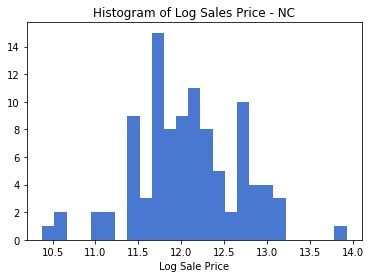

In [36]:
plt.hist(np.log(fixed_nc['SalePrice']),bins = 25)
plt.xlabel('Log Sale Price')
plt.title('Histogram of Log Sales Price - NC')

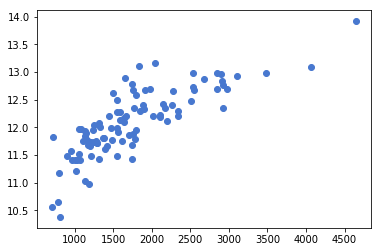

In [28]:
plt.scatter(fixed_nc.Sq_Ft, np.log(fixed_nc.SalePrice))

### C. Merge Data Sets

In [29]:
# Create Merged Data Set
#Clean CA and NC based on outliers and missing values found
fixed_ca = df_ca.loc[(df_ca['SalePrice'] < (np.std(df_ca['SalePrice'])*2 + np.mean(df_ca['SalePrice']))) & (df_ca['Bed'] != 0) ]
fixed_ca = fixed_ca.assign(logSalePrice = np.log(fixed_ca['SalePrice']) )
fixed_ca = fixed_ca.assign(Dataset = 'CA')

fixed_nc = df_nc.loc[(df_nc['SalePrice'] < (np.std(df_nc['SalePrice'])*2 + np.mean(df_nc['SalePrice']))) & (df_nc['LotArea'] > 1)]
fixed_nc = fixed_nc.assign(logSalePrice = np.log(fixed_nc['SalePrice']) )
fixed_nc = fixed_nc.assign(Dataset = 'NC')

# The merged data set is composed of all features that are common to at least one of the three individual data sets.

# Prep 1st Dataset (Iowa)
fixed_ia = og_iowa.copy()
# Select columns needed from Iowa DS 
fixed_ia = fixed_ia[['SalePrice', 'YearBuilt', 'HouseStyle', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', \
                   'BedroomAbvGr','TotalBsmtSF', 'GrLivArea', 'SaleType', 'LotArea', 'Fireplaces']]
# half bath is 0.5
fixed_ia['hbath'] = fixed_ia['BsmtHalfBath'] + fixed_ia['HalfBath']  
fixed_ia['hbath'] = np.where(fixed_ia['hbath'] > 0, fixed_ia['hbath']/2 , 0)
fixed_ia['bath'] = fixed_ia['BsmtFullBath'] + fixed_ia['FullBath'] + fixed_ia['hbath']
# sum up basement and other living area to get total sq. feet
fixed_ia['Sq_Ft'] = fixed_ia['TotalBsmtSF'] + fixed_ia['GrLivArea']
#Remove unwanted columns now that we have a new column for bath in DF and we have sq. feet
fixed_ia.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'hbath', 'TotalBsmtSF', 'GrLivArea'], axis =1, inplace = True)
# Renaming the columns on Iowa df to keep them uniform across all data sets
fixed_ia.columns = ['SalePrice', 'YearBuilt', 'Stories', 'Bed', 'SaleType', 'LotArea', 'Fireplaces', 'Bath', 'Sq_Ft']
fixed_ia = fixed_ia.assign(logSalePrice = np.log(fixed_ia['SalePrice']) )
fixed_ia = fixed_ia.assign(Dataset = 'IA')
fixed_ia = fixed_ia.loc[ (fixed_ia['Bed'] != 0)]


# Concatenation
df_final = pd.concat([fixed_ia,fixed_ca, fixed_nc], axis=0, ignore_index=True)
df_final.replace('', np.NaN)
df_final['YearBuilt'] = df_final['YearBuilt'].fillna(0).astype(np.int64)

In [30]:
df_final.describe()

,Bath,Bed,Fireplaces,LotArea,SalePrice,Sq_Ft,YearBuilt,logSalePrice
count,2302.000000,2207.000000,1550.000000,1550.000000,2.303000e+03,2303.000000,2303.000000,2303.000000
mean,2.233927,2.963752,0.621935,10951.885548,2.338264e+05,2248.431611,1326.902301,12.207328
std,0.773946,0.817172,0.635944,10368.784251,1.519515e+05,884.533964,925.367945,0.535769
min,1.000000,1.000000,0.000000,1300.000000,2.650000e+04,120.000000,0.000000,10.184900
25%,2.000000,3.000000,0.000000,7606.750000,1.397500e+05,1638.000000,0.000000,11.847610
50%,2.000000,3.000000,1.000000,9587.500000,1.870000e+05,2139.000000,1955.000000,12.138864
75%,3.000000,3.000000,1.000000,11884.500000,2.750000e+05,2784.000000,1988.000000,12.524526
max,11.000000,10.000000,3.000000,215245.000000,1.113750e+06,11752.000000,2010.000000,13.923243


### D. Do Trends Persist?

#### I. Year Built

#### II. Lot Area

Iowa has correlation of 0.25353478666783374
North Carolina has correlation of 0.20203695053097123


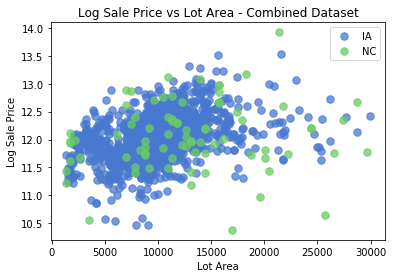

In [31]:
plt.figure(figsize=(12,10))
plt.subplots()
for title, group in df_final[df_final['Dataset'] != 'CA'].groupby('Dataset'):
    plt.plot(group['LotArea'][group['LotArea'] < max_size], np.log(group['SalePrice'][group['LotArea'] < max_size]), \
                alpha=.75, linestyle ='', ms=15, marker='.', label=title)
    plt.ylabel('Log Sale Price')
    plt.xlabel('Lot Area')
    plt.title('Log Sale Price vs Lot Area - Combined Dataset')
    title_dict = {'IA': 'Iowa', 'NC': 'North Carolina'}
    print(title_dict[title], 'has correlation of', np.corrcoef(group.LotArea, np.log(group.SalePrice))[0, 1])
plt.legend()

# The North Carolina data shows a similar trend with low correlation.

#### III. Living Area
#### IV. Bathrooms

Text(0.5,1,'Box Plot of Log Sale Price by Bathrooms')

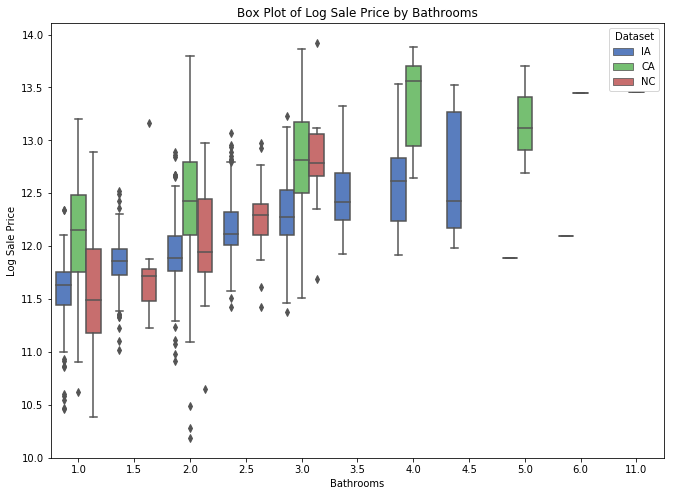

In [32]:
# plt.boxplot(df_final['Bath'], df_final['logSalePrice'], positions=df_final['Dataset'] )
sns.set_palette("muted")
dims = (11, 8)
fig, ax = plt.subplots(figsize=dims)
sns.boxplot(df_final['Bath'], df_final['logSalePrice'], hue=df_final['Dataset'])
plt.xlabel('Bathrooms')
plt.ylabel('Log Sale Price')
plt.title('Box Plot of Log Sale Price by Bathrooms')